### Instructor Demo: Correlation

This program reads in the CSV datasets of ice cream sales and drowning incidents, combines the two datasets into a single DataFrame, creates a line and scatterplot, and calculates the correlation between the two variables.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Read the ice cream sales data, set the `Month` as the index
ice_cream_sales_path = Path("./Resources/ice_cream.csv")
ice_cream_data = pd.read_csv(ice_cream_sales_path, parse_dates=True, index_col="Month")
ice_cream_data.head()

,Ice Cream Sales
Month,
January,175
February,150
March,200
April,190
May,250


In [3]:
# Read the drowning incident data, set the `Month` as the index
drowning_incident_path = Path("./Resources/drowning.csv")
drowning_data = pd.read_csv(drowning_incident_path, parse_dates=True, index_col="Month")
drowning_data.head()

,Drowning Incidents
Month,
January,0
February,1
March,3
April,2
May,10


### Combine the DataFrames

In [4]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([ice_cream_data, drowning_data], axis='columns', join='inner')
combined_df

,Ice Cream Sales,Drowning Incidents
Month,,
January,175,0
February,150,1
March,200,3
April,190,2
May,250,10
June,400,12
July,560,15
August,545,12
September,450,5


### Plot Trends

<AxesSubplot:xlabel='Month'>

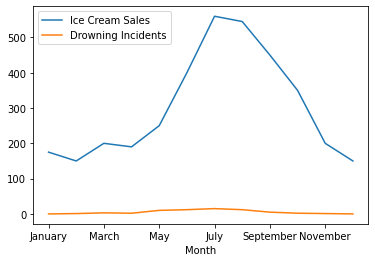

In [5]:
# Plot the data trends of the two variables over time
combined_df.plot()

### Plot Relationships

<AxesSubplot:xlabel='Ice Cream Sales', ylabel='Drowning Incidents'>

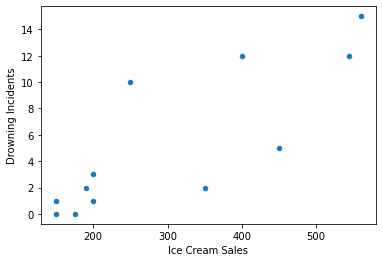

In [6]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='Ice Cream Sales', y='Drowning Incidents')

### Calculate Correlation

In [7]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

,Ice Cream Sales,Drowning Incidents
Ice Cream Sales,1.000000,0.819404
Drowning Incidents,0.819404,1.000000


### Plot Correlations

<AxesSubplot:>

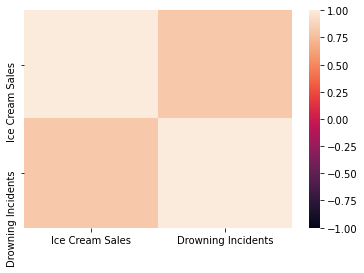

In [8]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)